### Name : Ayodya W.K.H
### Index Number : 190065K

#### Question 1
Run gradient descent to find the minimum of $f(x) = x^4 − x^3 − 12x^2 + 15^x + 5$. Show with examples that
<br>(a) Initial solution matters.
<br>(b) Learning rate is important to tune

Question 1(a) : <b>When we change the initial x value then it changes the convergence value.</b>

x =  -2.4003994283530288 f(x) =  -53.11840483760499


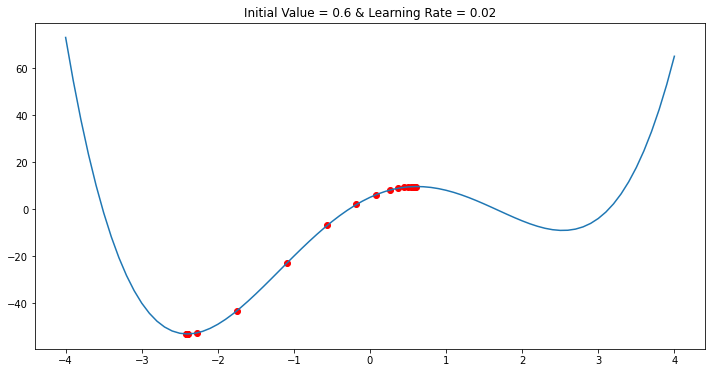

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    w = np.array([1, -1, -12, 15, 5])
    M = np.size(w) - 1
    return np.sum([x**i * w[M - i] for i in range(0, M + 1)], axis = 0)
def g(x):
    w = np.array([1, -1, -12, 15, 5])
    M = np.size(w) - 1
    return np.sum([i * x**(i - 1) * w[M - i] for i in range(0, M + 1)], axis = 0)
    
alpha = 0.02
x = 0.6
x_hist = np.array(x)
fx_hist = np.array(f(x))

for i in range(20):
    x = x - alpha * g(x)
    x_hist = np.append(x_hist, x)
    fx_hist = np.append(fx_hist, f(x))

print('x = ', x, 'f(x) = ', f(x))

delta = 0.1
x_ = np.arange(-4, 4 + delta, delta)
fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(1, 1, 1)
ax.plot(x_, f(x_)), ax.set_title("Initial Value = 0.6 & Learning Rate = 0.02")
ax.scatter(x_hist, fx_hist, c ='r')
plt.show()

x =  2.533852789502441 f(x) =  -9.083837307977127


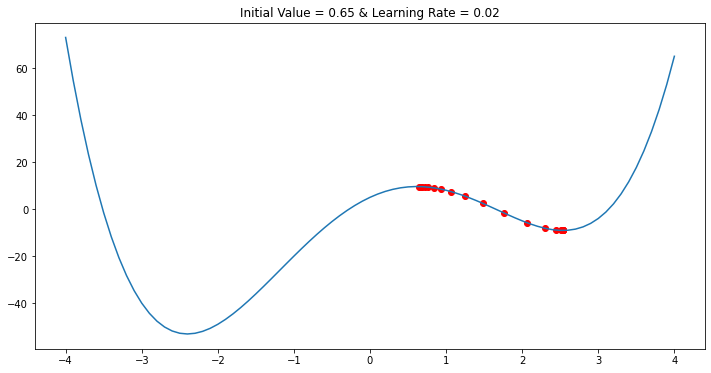

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    w = np.array([1, -1, -12, 15, 5])
    M = np.size(w) - 1
    return np.sum([x**i * w[M - i] for i in range(0, M + 1)], axis = 0)
def g(x):
    w = np.array([1, -1, -12, 15, 5])
    M = np.size(w) - 1
    return np.sum([i * x**(i - 1) * w[M - i] for i in range(0, M + 1)], axis = 0)

alpha = 0.02
x = 0.65
x_hist = np.array(x)
fx_hist = np.array(f(x))

for i in range(20):
    x = x - alpha * g(x)
    x_hist = np.append(x_hist, x)
    fx_hist = np.append(fx_hist, f(x))

delta = 0.1
x_ = np.arange(-4, 4 + delta, delta)
print('x = ', x, 'f(x) = ', f(x))
fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(1, 1, 1)
ax.plot(x_, f(x_)), ax.set_title("Initial Value = 0.65 & Learning Rate = 0.02")
ax.scatter(x_hist, fx_hist, c ='r')
plt.show()

Question 1(b) : <b>When we change the learning rate, it does not converge properly. Sometimes it overshoot. Thus it is more important to tune the learning rate.</b>

x =  -0.29497479850285213 f(x) =  -0.43550699945570187


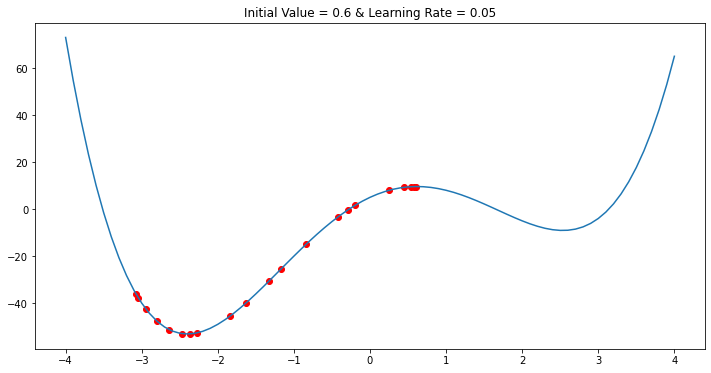

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    w = np.array([1, -1, -12, 15, 5])
    M = np.size(w) - 1
    return np.sum([x**i * w[M - i] for i in range(0, M + 1)], axis = 0)
def g(x):
    w = np.array([1, -1, -12, 15, 5])
    M = np.size(w) - 1
    return np.sum([i * x**(i - 1) * w[M - i] for i in range(0, M + 1)], axis = 0)

alpha = 0.05
x = 0.6
x_hist = np.array(x)
fx_hist = np.array(f(x))

for i in range(20):
    x = x - alpha * g(x)
    x_hist = np.append(x_hist, x)
    fx_hist = np.append(fx_hist, f(x))

delta = 0.1
x_ = np.arange(-4, 4 + delta, delta)
print('x = ', x, 'f(x) = ', f(x))
fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(1, 1, 1)
ax.plot(x_, f(x_)), ax.set_title("Initial Value = 0.6 & Learning Rate = 0.05")
ax.scatter(x_hist, fx_hist, c ='r')
plt.show()

#### Question 2
Train a linear classifier for CIFAR101 (3 × 32 × 32 images, 10 classes) using SDG. Use mean square loss and a minibatch size of 100.

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10, mnist

(x_train , y_train), (x_test, y_test) = cifar10.load_data( )
# (x_train, y_train), (x_test, y_test) = mnist.load_data( )
print ( " x_train => " , x_train . shape )

Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
x_train = x_train[range(Ntr), :]
x_test = x_test[range(Nte), :]
y_train = y_train[range(Ntr)]
y_test = y_test[range(Nte)]

K = len(np.unique(y_train)) #10

y_train = tf.keras.utils.to_categorical(y_train, num_classes = K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = K)

x_train = np.reshape(x_train, (Ntr, Din))
x_test = np.reshape(x_test, (Nte, Din))
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

x_train /= 255.
x_test /= 255.

170498071/170498071 [==============================] - 43s 0us/step
 x_train =>  (50000, 32, 32, 3)


In [28]:
# Utility function for diaplaying
def display(y_train, y_test, y_train_pred, y_test_pred, loss_history, w, showim = True):
    plt.plot(loss_history)

     # For diapaying the weights matrix w as an image. 32*32*3 assumption is there
    if showim:
        f, axarr = plt.subplots(2, 5)
        f.set_size_inches(16, 6)        
        for i in range(10):
            img = w[:, i].reshape(32, 32, 3)# CIFAR10
            # img = w1[:, i].reshape(28, 28)# MNIST    
            img = (img - np.amin(img))/(np.amax(img) - np.amin(img))
            axarr[i//5, i%5].imshow(img)
        plt.show()

    train_acc = np.mean(np.abs(np.argmax(y_train, axis=1) == np.argmax(y_train_pred, axis=1)))
    print("train_acc = ", train_acc)

    test_acc = np.mean(np.abs(np.argmax(y_test, axis=1) == np.argmax(y_test_pred, axis=1)))
    print("test_acc = ", test_acc)

In [36]:
std = 1e-5
w = std * np.random.randn(Din, K)
b = np.zeros(K)
lr = 1e-3
lr_decay = 0.1
epochs = 11
batch_size = 1000
loss_history = []
rng = np.random.default_rng(seed = 0)

for e in range(epochs):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    for batch in range((Ntr//batch_size)):
        batch_indices = indices[batch * batch_size:(batch + 1) * batch_size]
        x = x_train[batch_indices]
        y = y_train[batch_indices]

        #forward pass
        y_pred = x@w + b
        loss = 1./batch_size * np.square(y_pred - y).sum()
        loss_history.append(loss)

        #backward pass
        dy_pred = 1./batch_size * 2.0 * (y_pred - y)
        dw = x.T @ dy_pred
        db = dy_pred.sum(axis = 0)*1
        w = w -lr * dw
        b = b -lr * db

    if e % 5 == 0:
        print('Iteration %d / %d: loss %f'%(e, epochs, loss))
    if e % 10 == 0:
        lr *= lr_decay 

Iteration 0 / 11: loss 0.850458
Iteration 5 / 11: loss 0.836765
Iteration 10 / 11: loss 0.834909


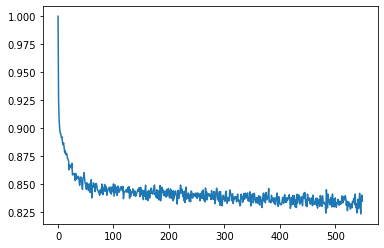

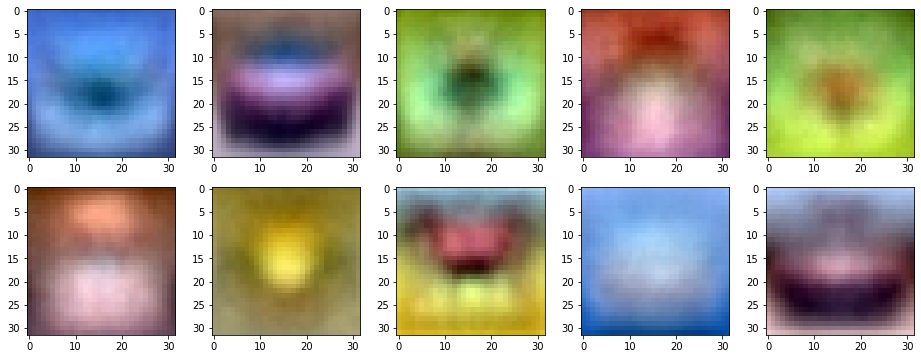

train_acc =  0.33574
test_acc =  0.3352


In [37]:
y_train_pred = x_train.dot(w) + b
y_test_pred = x_test.dot(w) + b
display(y_train, y_test, y_train_pred, y_test_pred, loss_history, w, showim = True)